<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n20.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.808461,84.992590,-39.693105,143.107946,167.996294,-24.888347
1,0.0,1.0,98.387924,86.054862,119.055718,313.498504,181.915488,131.583016
2,0.0,2.0,98.172064,55.985420,33.775684,197.933167,167.185810,30.747357
3,0.0,3.0,90.812070,28.780211,77.938369,207.530650,144.778600,62.752051
4,0.0,4.0,38.302879,24.459489,-76.710197,-3.947828,76.150798,-80.098626
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.094572,98.198409,-192.122889,-33.829908,141.186751,-175.016659
249996,999.0,246.0,90.534238,71.613352,215.881223,388.028813,173.375669,214.653144
249997,999.0,247.0,87.360320,79.922130,127.953885,305.236334,174.422234,130.814100
249998,999.0,248.0,20.665436,91.848846,-202.507445,-79.993164,103.006667,-182.999830


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.808461,84.992590,-39.693105,143.107946,167.996294,-24.888347
1,0.0,1.0,98.387924,86.054862,119.055718,313.498504,181.915488,131.583016
2,0.0,2.0,98.172064,55.985420,33.775684,197.933167,167.185810,30.747357
3,0.0,3.0,90.812070,28.780211,77.938369,207.530650,144.778600,62.752051
4,0.0,4.0,38.302879,24.459489,-76.710197,-3.947828,76.150798,-80.098626
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.094572,98.198409,-192.122889,-33.829908,141.186751,-175.016659
249996,999.0,246.0,90.534238,71.613352,215.881223,388.028813,173.375669,214.653144
249997,999.0,247.0,87.360320,79.922130,127.953885,305.236334,174.422234,130.814100
249998,999.0,248.0,20.665436,91.848846,-202.507445,-79.993164,103.006667,-182.999830


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,87.808461,84.992590,-39.693105,143.107946,167.996294,-24.888347
1,0.0,1.0,98.387924,86.054862,119.055718,313.498504,181.915488,131.583016
2,0.0,2.0,98.172064,55.985420,33.775684,197.933167,167.185810,30.747357
3,0.0,3.0,90.812070,28.780211,77.938369,207.530650,144.778600,62.752051
4,0.0,4.0,38.302879,24.459489,-76.710197,-3.947828,76.150798,-80.098626
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,50.094572,98.198409,-192.122889,-33.829908,141.186751,-175.016659
249996,999.0,246.0,90.534238,71.613352,215.881223,388.028813,173.375669,214.653144
249997,999.0,247.0,87.360320,79.922130,127.953885,305.236334,174.422234,130.814100
249998,999.0,248.0,20.665436,91.848846,-202.507445,-79.993164,103.006667,-182.999830


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    87.808461  84.992590  -39.693105  143.107946  167.996294   
      1.0    98.387924  86.054862  119.055718  313.498504  181.915488   
      2.0    98.172064  55.985420   33.775684  197.933167  167.185810   
      3.0    90.812070  28.780211   77.938369  207.530650  144.778600   
      4.0    38.302879  24.459489  -76.710197   -3.947828   76.150798   
...                ...        ...         ...         ...         ...   
999.0 245.0  50.094572  98.198409 -192.122889  -33.829908  141.186751   
      246.0  90.534238  71.613352  215.881223  388.028813  173.375669   
      247.0  87.360320  79.922130  127.953885  305.236334  174.422234   
      248.0  20.665436  91.848846 -202.507445  -79.993164  103.006667   
      249.0  44.469401  48.430383  155.405229  258.305013  106.008139   

                  e_hat  
rep   index              
0.0   0.0    -24.888347  
      1.0    131.583016  
      2.0     30.747357  
      3.0     62.752051  
      4.0    -80.098626  
...                 ...  
999.0 245.0 -175.016659  
      246.0  214.653144  
      247.0  130.814100  
      248.0 -182.999830  
      249.0  152.296874  

[250000 rows x 6 columns]

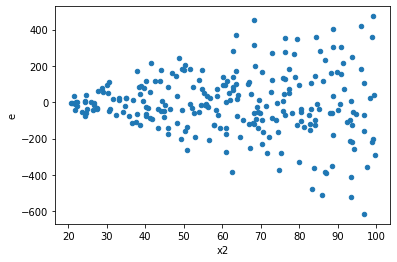

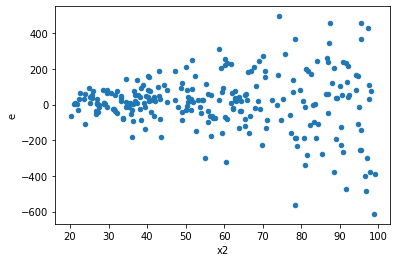

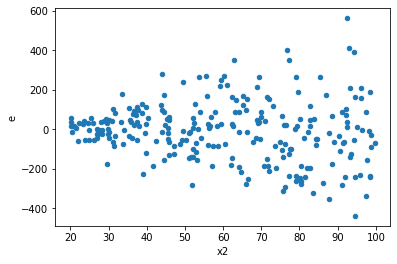

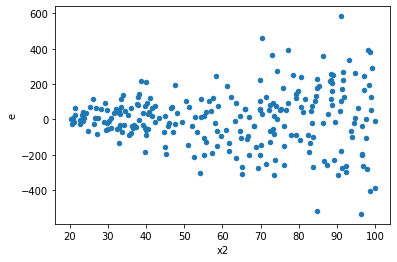

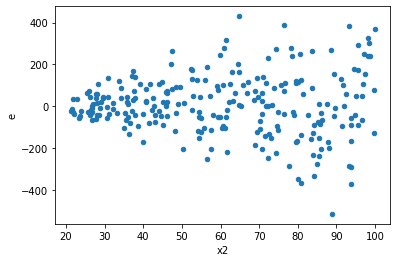

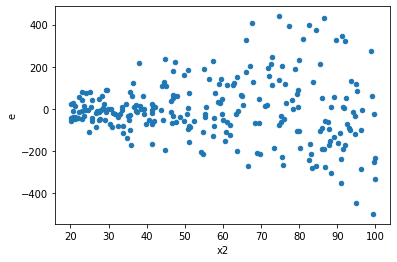

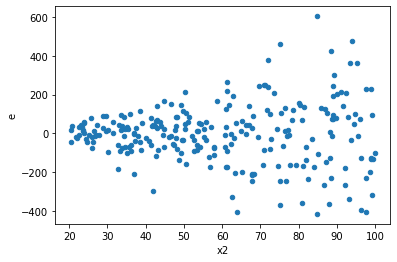

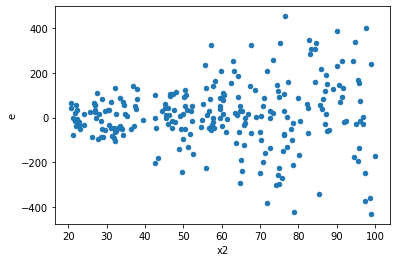

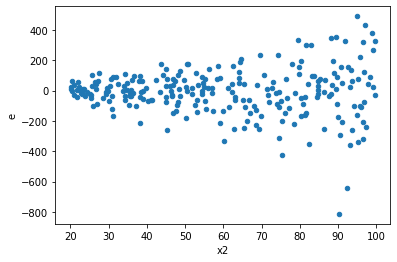

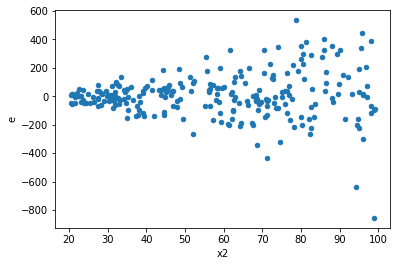

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,98.0,98.0,2492886.358655073,3539251.7449989975,25437.615904643604,36114.813724479565,1.4197405079100536,0.08435598849569592,0.957822005752152,0.04217799424784796,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,2003408.126445994,3477431.202101682,20442.94006577545,35483.99185818043,1.7357577600878438,0.00681730658391122,0.9965913467080444,0.00340865329195561,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,1510283.1323512031,3257024.7214562246,15411.052370930644,33234.94613730841,2.156565647651577,0.00017740481923600449,0.999911297590382,8.870240961800224e-05,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,1189951.1074366828,2845759.9614574034,12142.358239149824,29038.36695364697,2.391493182932162,2.239829824102202e-05,0.9999888008508795,1.119914912051101e-05,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,1353168.6658915065,2953315.496420223,13807.843529505168,30135.872412451252,2.1825183887734303,0.00014114014508992412,0.999929429927455,7.057007254496206e-05,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,1620253.0202717073,3380301.594167991,16533.194084405175,34492.87340987746,2.086280075936,0.00032930937740371924,0.9998353453112981,0.00016465468870185962,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,570803.7285511442,3593039.5403179857,5824.527842358615,36663.66877875495,6.294702295372353,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,850388.0899736694,3717220.2935873326,8677.429489527238,37930.81932231972,4.371204556383697,2.7824409443155673e-12,0.9999999999986088,1.3912204721577837e-12,Reject001=0 : Heteroscedasticity
9.0,98.0,98.0,646744.7832430744,4513491.0237441035,6599.436563704841,46056.030854531666,6.978782265720634,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,2492886.358655073,3539251.7449989975,25437.615904643604,36114.813724479565,1.4197405079100536,0.08435598849569592,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,2003408.126445994,3477431.202101682,20442.94006577545,35483.99185818043,1.7357577600878438,0.00681730658391122,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,2079636.557959398,1860061.5695805238,21220.781203667328,18980.220097760448,0.8944166529778993,0.5817976170105257,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,1510283.1323512031,3257024.7214562246,15411.052370930644,33234.94613730841,2.156565647651577,0.00017740481923600449,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,1189951.1074366828,2845759.9614574034,12142.358239149824,29038.36695364697,2.391493182932162,2.239829824102202e-05,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,1353168.6658915065,2953315.496420223,13807.843529505168,30135.872412451252,2.1825183887734303,0.00014114014508992412,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,1620253.0202717073,3380301.594167991,16533.194084405175,34492.87340987746,2.086280075936,0.00032930937740371924,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,570803.7285511442,3593039.5403179857,5824.527842358615,36663.66877875495,6.294702295372353,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,850388.0899736694,3717220.2935873326,8677.429489527238,37930.81932231972,4.371204556383697,2.7824409443155673e-12,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    831
Reject001=1 : Homoscedasticity      169
Name: Result_test, dtype: int64